<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gafs_transformer_encoder_decoder_cslr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy to local.
!cp ./drive/MyDrive/Datasets/gafs_dataset_very_small.zip gafs_dataset.zip

In [3]:
!unzip -o gafs_dataset.zip

Archive:  gafs_dataset.zip
   creating: gafs_dataset_very_small/
  inflating: gafs_dataset_very_small/0.hdf5  
  inflating: gafs_dataset_very_small/1.hdf5  
  inflating: gafs_dataset_very_small/10.hdf5  
  inflating: gafs_dataset_very_small/102.hdf5  
  inflating: gafs_dataset_very_small/105.hdf5  
  inflating: gafs_dataset_very_small/107.hdf5  
  inflating: gafs_dataset_very_small/109.hdf5  
  inflating: gafs_dataset_very_small/112.hdf5  
  inflating: gafs_dataset_very_small/113.hdf5  
  inflating: gafs_dataset_very_small/115.hdf5  
  inflating: gafs_dataset_very_small/117.hdf5  
  inflating: gafs_dataset_very_small/121.hdf5  
  inflating: gafs_dataset_very_small/122.hdf5  
  inflating: gafs_dataset_very_small/125.hdf5  
  inflating: gafs_dataset_very_small/128.hdf5  
  inflating: gafs_dataset_very_small/13.hdf5  
  inflating: gafs_dataset_very_small/135.hdf5  
  inflating: gafs_dataset_very_small/136.hdf5  
  inflating: gafs_dataset_very_small/138.hdf5  
  inflating: gafs_dataset_ver

In [4]:
!ls gafs_dataset_very_small

0.hdf5	  135.hdf5  160.hdf5  1.hdf5	236.hdf5  43.hdf5  80.hdf5
102.hdf5  136.hdf5  161.hdf5  202.hdf5	239.hdf5  4.hdf5   81.hdf5
105.hdf5  138.hdf5  168.hdf5  203.hdf5	241.hdf5  53.hdf5  88.hdf5
107.hdf5  13.hdf5   169.hdf5  20.hdf5	242.hdf5  56.hdf5  89.hdf5
109.hdf5  141.hdf5  171.hdf5  216.hdf5	246.hdf5  59.hdf5  92.hdf5
10.hdf5   143.hdf5  176.hdf5  217.hdf5	24.hdf5   63.hdf5  93.hdf5
112.hdf5  145.hdf5  178.hdf5  219.hdf5	251.hdf5  68.hdf5  95.hdf5
113.hdf5  147.hdf5  181.hdf5  21.hdf5	254.hdf5  6.hdf5   9.hdf5
115.hdf5  151.hdf5  186.hdf5  223.hdf5	25.hdf5   70.hdf5  character_to_prediction_index.json
117.hdf5  153.hdf5  187.hdf5  225.hdf5	27.hdf5   71.hdf5  LICENSE.txt
121.hdf5  154.hdf5  188.hdf5  227.hdf5	2.hdf5	  72.hdf5
122.hdf5  157.hdf5  18.hdf5   230.hdf5	36.hdf5   73.hdf5
125.hdf5  158.hdf5  192.hdf5  231.hdf5	38.hdf5   74.hdf5
128.hdf5  15.hdf5   196.hdf5  233.hdf5	40.hdf5   76.hdf5


In [5]:
!cat gafs_dataset_very_small/character_to_prediction_index.json

{" ":0,"!":1,"#":2,"$":3,"%":4,"&":5,"'":6,"(":7,")":8,"*":9,"+":10,",":11,"-":12,".":13,"\/":14,"0":15,"1":16,"2":17,"3":18,"4":19,"5":20,"6":21,"7":22,"8":23,"9":24,":":25,";":26,"=":27,"?":28,"@":29,"[":30,"_":31,"a":32,"b":33,"c":34,"d":35,"e":36,"f":37,"g":38,"h":39,"i":40,"j":41,"k":42,"l":43,"m":44,"n":45,"o":46,"p":47,"q":48,"r":49,"s":50,"t":51,"u":52,"v":53,"w":54,"x":55,"y":56,"z":57,"~":58}

In [6]:
!cat gafs_dataset_very_small/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GASF very small dataset
Original licenser: Google LLC
Modification
- Extract only 3 parquet file.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("gafs_dataset_very_small/0.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys[:10])
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1720198121', '1722303176', '1723157122', '1731934631', '1737624109', '1739256200', '1743069372', '1743412187', '1744795751', '1746320345']
<KeysViewHDF5 ['feature', 'token']>
(2, 271, 543)
[14 38 32 45 44 36 40 32 43 43 36 56 14 43 40 45 32 12 34 32 49 50 51 36
 45 50]


In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.3.6.zip -O master.zip

--2024-09-21 02:16:50--  https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.3.6.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.3.6 [following]
--2024-09-21 02:16:50--  https://codeload.github.com/takayama-rado/trado_samples/zip/refs/tags/v0.3.6
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [       <=>          ]  76.58M  14.4MB/s    in 6.2s    

2024-09-21 02:16:57 (12.4 MB/s) - ‘master.zip’ saved [80305369]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
5b1307e0c758e696f5e99e0c804b29b32d061333
   creating: master/trado_samples-0.3.6/
  inflating: master/trado_samples-0.3.6/.gitignore  
  inflating: master/trado_samples-0.3.6/LICENSE  
  inflating: master/trado_samples-0.3.6/README.md  
   creating: master/trado_samples-0.3.6/colab_files/
 extracting: master/trado_samples-0.3.6/colab_files/.gitkeep  
  inflating: master/trado_samples-0.3.6/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-0.3.6/colab_files/exp_track_affi

In [10]:
!mv master/trado_samples-0.3.6/src/modules_gislr .

In [11]:
!rm -rf master master.zip gafs_dataset_very_small.zip

In [12]:
!ls

drive  gafs_dataset_very_small	gafs_dataset.zip  modules_gislr  sample_data


# 2. Load library

In [13]:
import copy
import json
import math
import os
import sys
import time
from functools import partial
from inspect import signature
from pathlib import Path

# Third party's modules
import numpy as np

import torch

from nltk.metrics.distance import edit_distance

from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    MultiheadAttention,
    PositionalEncoding,
    PositionwiseFeedForward,
    Identity,
    TransformerEncoder,
    TransformerEncoderLayer,
    apply_norm,
    create_norm
)
from modules_gislr.transforms import (
    InsertTokensForS2S,
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)
from modules_gislr.utils import (
    make_causal_mask,
    make_san_mask,
    select_reluwise_activation
)

In [14]:
# Patch for train_functions.
# This is only required for this script.
def forward(model, feature, tokens, feature_pad_mask, tokens_pad_mask, tokens_causal_mask=None):
    if isinstance(model, TransformerCSLR):
        if tokens_causal_mask is None:
            tokens_causal_mask = make_causal_mask(tokens_pad_mask)
        if tokens_causal_mask.shape[-1] != tokens_pad_mask.shape[-1]:
            tokens_causal_mask = make_causal_mask(tokens_pad_mask)
        preds = model(src_feature=feature,
                      tgt_feature=tokens,
                      src_causal_mask=None,
                      src_padding_mask=feature_pad_mask,
                      tgt_causal_mask=tokens_causal_mask,
                      tgt_padding_mask=tokens_pad_mask)
    else:
        raise NotImplementedError(f"Unknown model type:{type(model)}.")
    return preds, tokens_causal_mask

def inference(model, feature, start_id, end_id, max_seqlen=62):
    if isinstance(model, TransformerCSLR):
        pred_ids, _ = model.inference(feature,
                                      start_id,
                                      end_id,
                                      max_seqlen=max_seqlen)
    else:
        raise NotImplementedError(f"Unknown model type:{type(model)}.")
    return pred_ids

from modules_gislr import train_functions
train_functions.forward = forward
train_functions.inference = inference

from modules_gislr.train_functions import (
    LabelSmoothingCrossEntropyLoss,
    train_loop_csir_s2s,
    val_loop_csir_s2s,
    test_loop_csir_s2s)

# 3. Implement Transformer Encoder-Decoder CSLR model

### Transformer Decoder

In [15]:
class TransformerDecoderLayer(nn.Module):
    def __init__(self,
                 dim_model,
                 num_heads,
                 dim_ffw,
                 dropout,
                 activation,
                 norm_type_sattn,
                 norm_type_cattn,
                 norm_type_ffw,
                 norm_eps,
                 norm_first,
                 add_bias):
        super().__init__()

        self.norm_first = norm_first

        #################################################
        # MHSA.
        #################################################
        self.self_attn = MultiheadAttention(
            key_dim=dim_model,
            query_dim=dim_model,
            att_dim=dim_model,
            out_dim=dim_model,
            num_heads=num_heads,
            dropout=dropout,
            add_bias=add_bias)
        self.norm_sattn = create_norm(norm_type_sattn, dim_model, norm_eps, add_bias)

        #################################################
        # MHCA.
        #################################################
        self.cross_attn = MultiheadAttention(
            key_dim=dim_model,
            query_dim=dim_model,
            att_dim=dim_model,
            out_dim=dim_model,
            num_heads=num_heads,
            dropout=dropout,
            add_bias=add_bias)
        self.norm_cattn = create_norm(norm_type_cattn, dim_model, norm_eps, add_bias)

        #################################################
        # PFFN.
        #################################################
        self.ffw = PositionwiseFeedForward(
            dim_model=dim_model,
            dim_ffw=dim_ffw,
            dropout=dropout,
            activation=activation,
            add_bias=add_bias)
        self.norm_ffw = create_norm(norm_type_ffw, dim_model, norm_eps, add_bias)

        self.dropout = nn.Dropout(p=dropout)

        # To store attention weights.
        self.sattw = None
        self.cattw = None

    def _forward_prenorm(self,
                         tgt_feature,
                         enc_feature,
                         tgt_san_mask,
                         enc_tgt_mask):
        """Pre-normalization structure.

        For the details, please refer
        https://arxiv.org/pdf/2002.04745v1.pdf
        """
        #################################################
        # self-attention
        #################################################
        residual = tgt_feature
        tgt_feature = apply_norm(self.norm_sattn, tgt_feature)
        tgt_feature, self.sattw = self.self_attn(
            key=tgt_feature,
            value=tgt_feature,
            query=tgt_feature,
            mask=tgt_san_mask)
        tgt_feature = self.dropout(tgt_feature) + residual

        #################################################
        # cross-attention
        #################################################
        residual = tgt_feature
        tgt_feature = apply_norm(self.norm_cattn, tgt_feature)
        tgt_feature, self.cattw = self.cross_attn(
            key=enc_feature,
            value=enc_feature,
            query=tgt_feature,
            mask=enc_tgt_mask)
        tgt_feature = self.dropout(tgt_feature) + residual

        #################################################
        # FFW
        #################################################
        residual = tgt_feature
        tgt_feature = apply_norm(self.norm_ffw, tgt_feature)
        tgt_feature = self.ffw(tgt_feature)
        tgt_feature = self.dropout(tgt_feature) + residual
        return tgt_feature

    def _forward_postnorm(self,
                          tgt_feature,
                          enc_feature,
                          tgt_san_mask,
                          enc_tgt_mask):
        """Post-normalization structure (standard).

        """
        #################################################
        # self-attention
        #################################################
        residual = tgt_feature
        tgt_feature, self.sattw = self.self_attn(
            key=tgt_feature,
            value=tgt_feature,
            query=tgt_feature,
            mask=tgt_san_mask)
        tgt_feature = self.dropout(tgt_feature) + residual
        tgt_feature = apply_norm(self.norm_sattn, tgt_feature)

        #################################################
        # cross-attention
        #################################################
        residual = tgt_feature
        tgt_feature, self.cattw = self.cross_attn(
            key=enc_feature,
            value=enc_feature,
            query=tgt_feature,
            mask=enc_tgt_mask)
        tgt_feature = self.dropout(tgt_feature) + residual
        tgt_feature = apply_norm(self.norm_cattn, tgt_feature)

        #################################################
        # FFW
        #################################################
        residual = tgt_feature
        tgt_feature = self.ffw(tgt_feature)
        tgt_feature = self.dropout(tgt_feature) + residual
        tgt_feature = apply_norm(self.norm_ffw, tgt_feature)

        return tgt_feature

    def forward(self,
                tgt_feature,
                enc_feature,
                tgt_causal_mask=None,
                enc_tgt_causal_mask=None,
                tgt_key_padding_mask=None,
                enc_key_padding_mask=None):

        # Create mask.
        if tgt_key_padding_mask is None:
            tgt_key_padding_mask = torch.ones(tgt_feature.shape[:2],
                                              dtype=enc_feature.dtype,
                                              device=enc_feature.device)
        tgt_san_mask = make_san_mask(tgt_key_padding_mask, tgt_causal_mask)
        if enc_key_padding_mask is None:
            enc_key_padding_mask = torch.ones(enc_feature.shape[:2],
                                              dtype=enc_feature.dtype,
                                              device=enc_feature.device)
        enc_tgt_mask = enc_key_padding_mask.unsqueeze(1).repeat(
            [1, tgt_feature.shape[1], 1])
        if enc_tgt_causal_mask is not None:
            enc_tgt_mask = enc_tgt_mask & enc_tgt_causal_mask

        if self.norm_first:
            tgt_feature = self._forward_prenorm(tgt_feature, enc_feature,
                                                tgt_san_mask, enc_tgt_mask)
        else:
            tgt_feature = self._forward_postnorm(tgt_feature, enc_feature,
                                                 tgt_san_mask, enc_tgt_mask)

        return tgt_feature

In [16]:
class TransformerDecoder(nn.Module):
    def __init__(self,
                 decoder_layer,
                 out_channels,
                 num_layers,
                 dim_model,
                 dropout_pe,
                 norm_type_tail,
                 norm_eps,
                 norm_first,
                 add_bias,
                 add_tailnorm,
                 padding_val):
        super().__init__()

        self.emb_layer = nn.Embedding(out_channels,
                                      dim_model,
                                      padding_idx=padding_val)
        self.vocab_size = out_channels

        self.pos_encoder = PositionalEncoding(dim_model, dropout_pe)
        self.layers = nn.ModuleList([copy.deepcopy(decoder_layer) for _ in range(num_layers)])

        # Add LayerNorm at tail position.
        # This is applied only when norm_first is True because
        # post-normalization structure includes tail-normalization in encoder
        # layers.
        if add_tailnorm and norm_first:
            self.norm_tail = create_norm(norm_type_tail, dim_model, norm_eps, add_bias)
        else:
            self.norm_tail = Identity()

        self.head = nn.Linear(dim_model, out_channels)

        self.reset_parameters(dim_model, padding_val)

    def reset_parameters(self, embedding_dim, padding_val):
        # Bellow initialization has strong effect to performance.
        # Please refer.
        # https://github.com/facebookresearch/fairseq/blob/main/fairseq/models/transformer/transformer_base.py#L189
        nn.init.normal_(self.emb_layer.weight, mean=0, std=embedding_dim**-0.5)
        nn.init.constant_(self.emb_layer.weight[padding_val], 0)

        # Please refer.
        # https://github.com/facebookresearch/fairseq/blob/main/fairseq/models/transformer/transformer_decoder.py
        nn.init.xavier_uniform_(self.head.weight)
        nn.init.constant_(self.head.bias, 0.0)

    def forward(self,
                tgt_feature,
                enc_feature,
                tgt_causal_mask,
                enc_tgt_causal_mask,
                tgt_key_padding_mask,
                enc_key_padding_mask):

        tgt_feature = self.emb_layer(tgt_feature) * math.sqrt(self.vocab_size)

        tgt_feature = self.pos_encoder(tgt_feature)
        for layer in self.layers:
            tgt_feature = layer(
                tgt_feature=tgt_feature,
                enc_feature=enc_feature,
                tgt_causal_mask=tgt_causal_mask,
                enc_tgt_causal_mask=enc_tgt_causal_mask,
                tgt_key_padding_mask=tgt_key_padding_mask,
                enc_key_padding_mask=enc_key_padding_mask)
        tgt_feature = apply_norm(self.norm_tail, tgt_feature)

        logit = self.head(tgt_feature)
        return logit

### Transformer CSIR model

In [17]:
class TransformerCSLR(nn.Module):
    def __init__(self,
                 in_channels,
                 inter_channels,
                 out_channels,
                 padding_val,
                 activation="relu",
                 tren_num_layers=1,
                 tren_num_heads=1,
                 tren_dim_ffw=256,
                 tren_dropout_pe=0.1,
                 tren_dropout=0.1,
                 tren_norm_type_sattn="layer",
                 tren_norm_type_ffw="layer",
                 tren_norm_type_tail="layer",
                 tren_norm_eps=1e-5,
                 tren_norm_first=True,
                 tren_add_bias=True,
                 tren_add_tailnorm=True,
                 trde_num_layers=1,
                 trde_num_heads=1,
                 trde_dim_ffw=256,
                 trde_dropout_pe=0.1,
                 trde_dropout=0.1,
                 trde_norm_type_sattn="layer",
                 trde_norm_type_cattn="layer",
                 trde_norm_type_ffw="layer",
                 trde_norm_type_tail="layer",
                 trde_norm_eps=1e-5,
                 trde_norm_first=True,
                 trde_add_bias=True,
                 trde_add_tailnorm=True):
        super().__init__()

        # Feature extraction.
        self.linear = nn.Linear(in_channels, inter_channels)
        self.activation = select_reluwise_activation(activation)

        # Transformer-Encoder.
        enlayer = TransformerEncoderLayer(
            dim_model=inter_channels,
            num_heads=tren_num_heads,
            dim_ffw=tren_dim_ffw,
            dropout=tren_dropout,
            activation=activation,
            norm_type_sattn=tren_norm_type_sattn,
            norm_type_ffw=tren_norm_type_ffw,
            norm_eps=tren_norm_eps,
            norm_first=tren_norm_first,
            add_bias=tren_add_bias)
        self.tr_encoder = TransformerEncoder(
            encoder_layer=enlayer,
            num_layers=tren_num_layers,
            dim_model=inter_channels,
            dropout_pe=tren_dropout_pe,
            norm_type_tail=tren_norm_type_tail,
            norm_eps=tren_norm_eps,
            norm_first=tren_norm_first,
            add_bias=tren_add_bias,
            add_tailnorm=tren_add_tailnorm)

        # Transformer-Decoder.
        delayer = TransformerDecoderLayer(
            dim_model=inter_channels,
            num_heads=trde_num_heads,
            dim_ffw=trde_dim_ffw,
            dropout=trde_dropout,
            activation=activation,
            norm_type_sattn=trde_norm_type_sattn,
            norm_type_cattn=trde_norm_type_cattn,
            norm_type_ffw=trde_norm_type_ffw,
            norm_eps=trde_norm_eps,
            norm_first=trde_norm_first,
            add_bias=trde_add_bias)
        self.tr_decoder = TransformerDecoder(
            decoder_layer=delayer,
            out_channels=out_channels,
            num_layers=trde_num_layers,
            dim_model=inter_channels,
            dropout_pe=trde_dropout_pe,
            norm_type_tail=trde_norm_type_tail,
            norm_eps=trde_norm_eps,
            norm_first=trde_norm_first,
            add_bias=trde_add_bias,
            add_tailnorm=trde_add_tailnorm,
            padding_val=padding_val)

    def forward(self,
                src_feature,
                tgt_feature,
                src_causal_mask,
                src_padding_mask,
                tgt_causal_mask,
                tgt_padding_mask):
        """Forward computation for train.
        """
        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = src_feature.shape
        src_feature = src_feature.permute([0, 2, 1, 3])
        src_feature = src_feature.reshape(N, T, -1)

        src_feature = self.linear(src_feature)

        enc_feature = self.tr_encoder(
            feature=src_feature,
            causal_mask=src_causal_mask,
            src_key_padding_mask=src_padding_mask)

        preds = self.tr_decoder(tgt_feature=tgt_feature,
                                enc_feature=enc_feature,
                                tgt_causal_mask=tgt_causal_mask,
                                enc_tgt_causal_mask=None,
                                tgt_key_padding_mask=tgt_padding_mask,
                                enc_key_padding_mask=src_padding_mask)
        # `[N, T, C]`
        return preds

    def inference(self,
                  src_feature,
                  start_id,
                  end_id,
                  src_padding_mask=None,
                  max_seqlen=62):
        """Forward computation for test.
        """

        # Feature extraction.
        # `[N, C, T, J] -> [N, T, C, J] -> [N, T, C*J] -> [N, T, C']`
        N, C, T, J = src_feature.shape
        src_feature = src_feature.permute([0, 2, 1, 3])
        src_feature = src_feature.reshape(N, T, -1)

        src_feature = self.linear(src_feature)

        enc_feature = self.tr_encoder(
            feature=src_feature,
            causal_mask=None,
            src_key_padding_mask=src_padding_mask)

        # Apply decoder.
        dec_inputs = torch.tensor([start_id]).to(src_feature.device)
        # `[N, T]`
        dec_inputs = dec_inputs.reshape([1, 1])
        preds = None
        pred_ids = [start_id]
        for _ in range(max_seqlen):
            pred = self.tr_decoder(
                tgt_feature=dec_inputs,
                enc_feature=enc_feature,
                tgt_causal_mask=None,
                enc_tgt_causal_mask=None,
                tgt_key_padding_mask=None,
                enc_key_padding_mask=src_padding_mask)
            # Extract last prediction.
            pred = pred[:, -1:, :]
            # `[N, T, C]`
            if preds is None:
                preds = pred
            else:
                # Concatenate last elements.
                preds = torch.cat([preds, pred], dim=1)

            pid = torch.argmax(pred, dim=-1)
            dec_inputs = torch.cat([dec_inputs, pid], dim=-1)

            pid = pid.reshape([1]).detach().cpu().numpy()[0]
            pred_ids.append(int(pid))
            if int(pid) == end_id:
                break

        # `[N, T]`
        pred_ids = np.array([pred_ids])
        return pred_ids, preds

# 4. Sanity check

In [18]:
# Access check.
dataset_dir = Path("gafs_dataset_very_small")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

gafs_dataset_very_small/character_to_prediction_index.json
[PosixPath('gafs_dataset_very_small/6.hdf5'), PosixPath('gafs_dataset_very_small/18.hdf5'), PosixPath('gafs_dataset_very_small/0.hdf5'), PosixPath('gafs_dataset_very_small/74.hdf5'), PosixPath('gafs_dataset_very_small/27.hdf5'), PosixPath('gafs_dataset_very_small/88.hdf5'), PosixPath('gafs_dataset_very_small/71.hdf5'), PosixPath('gafs_dataset_very_small/192.hdf5'), PosixPath('gafs_dataset_very_small/43.hdf5'), PosixPath('gafs_dataset_very_small/143.hdf5'), PosixPath('gafs_dataset_very_small/188.hdf5'), PosixPath('gafs_dataset_very_small/38.hdf5'), PosixPath('gafs_dataset_very_small/109.hdf5'), PosixPath('gafs_dataset_very_small/138.hdf5'), PosixPath('gafs_dataset_very_small/227.hdf5'), PosixPath('gafs_dataset_very_small/230.hdf5'), PosixPath('gafs_dataset_very_small/72.hdf5'), PosixPath('gafs_dataset_very_small/76.hdf5'), PosixPath('gafs_dataset_very_small/168.hdf5'), PosixPath('gafs_dataset_very_small/40.hdf5'), PosixPath('gaf

In [19]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)
# Add keywords.
key2token["<sos>"] = VOCAB
key2token["<eos>"] = VOCAB + 1
key2token["<pad>"] = VOCAB + 2
# Reset.
VOCAB = len(key2token)

In [20]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")
trans_insert_token = InsertTokensForS2S(sos_token=key2token["<sos>"], eos_token=key2token["<eos>"])

pre_transforms = Compose([
    trans_select_feature,
    trans_repnan,
    trans_insert_token,
    trans_norm
])

train_transforms = Compose([
    ToTensor()
])

val_transforms = Compose([
    ToTensor()
])

test_transforms = Compose([
    ToTensor()
])

In [21]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (-1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=key2token["<pad>"])

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=train_transforms)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]
    tokens_origin = data["token"]

    print(feature_origin.shape)
    print(tokens_origin)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 409, 130])
tensor([[59, 10, 24, 24, 20, 12, 19, 17, 22, 16, 12, 23, 19, 22, 16, 20, 60, 61,
         61, 61, 61, 61, 61, 61],
        [59, 10, 19, 16, 12, 21, 24, 12, 24, 17, 20, 12, 16, 15, 12, 20, 23, 12,
         24, 19, 16, 22, 24, 60]])


In [22]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
norm_type = "layer"
pad_token = key2token["<pad>"]
model = TransformerCSLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    padding_val=pad_token,
    activation="relu",
    tren_num_layers=2,
    tren_num_heads=2,
    tren_dim_ffw=256,
    tren_dropout_pe=0.1,
    tren_dropout=0.1,
    tren_norm_type_sattn=norm_type,
    tren_norm_type_ffw=norm_type,
    tren_norm_type_tail=norm_type,
    tren_norm_eps=1e-5,
    tren_norm_first=True,
    tren_add_bias=True,
    tren_add_tailnorm=True,
    trde_num_layers=2,
    trde_num_heads=2,
    trde_dim_ffw=256,
    trde_dropout_pe=0.1,
    trde_dropout=0.1,
    trde_norm_type_sattn=norm_type,
    trde_norm_type_cattn=norm_type,
    trde_norm_type_ffw=norm_type,
    trde_norm_type_tail=norm_type,
    trde_norm_eps=1e-5,
    trde_norm_first=True,
    trde_add_bias=True,
    trde_add_tailnorm=True)

print(model)

# Sanity check.
sample = next(iter(dataloader))
logit = model(src_feature=sample["feature"],
              tgt_feature=sample["token"],
              src_causal_mask=None,
              src_padding_mask=sample["feature_pad_mask"],
              tgt_causal_mask=make_causal_mask(sample["token_pad_mask"]),
              tgt_padding_mask=sample["token_pad_mask"])
print(logit.shape)

TransformerCSLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
     

# 5. Train and evaluation

## 5.1 Set common parameters

In [23]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 0
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4
label_smoothing = 0.1
sos_token = key2token["<sos>"]
eos_token = key2token["<eos>"]
pad_token = key2token["<pad>"]
max_seqlen = 60

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [24]:
# Build dataloaders.
train_dataset = HDF5Dataset(train_hdf5files,
    pre_transforms=pre_transforms, transforms=train_transforms, load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(val_hdf5files,
    pre_transforms=pre_transforms, transforms=val_transforms, load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(test_hdf5files,
    pre_transforms=pre_transforms, transforms=test_transforms, load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 5.2 Run training process

In [25]:
model_transformer = TransformerCSLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    padding_val=pad_token,
    activation="relu",
    tren_num_layers=2,
    tren_num_heads=2,
    tren_dim_ffw=256,
    tren_dropout_pe=0.1,
    tren_dropout=0.1,
    tren_norm_type_sattn=norm_type,
    tren_norm_type_ffw=norm_type,
    tren_norm_type_tail=norm_type,
    tren_norm_eps=1e-5,
    tren_norm_first=True,
    tren_add_bias=True,
    tren_add_tailnorm=True,
    trde_num_layers=2,
    trde_num_heads=2,
    trde_dim_ffw=256,
    trde_dropout_pe=0.1,
    trde_dropout=0.1,
    trde_norm_type_sattn=norm_type,
    trde_norm_type_cattn=norm_type,
    trde_norm_type_ffw=norm_type,
    trde_norm_type_tail=norm_type,
    trde_norm_eps=1e-5,
    trde_norm_first=True,
    trde_add_bias=True,
    trde_add_tailnorm=True)

print(model_transformer)

loss_fn = LabelSmoothingCrossEntropyLoss(
    ignore_indices=pad_token, reduction="mean_temporal_prior",
    label_smoothing=label_smoothing)
optimizer = torch.optim.Adam(model_transformer.parameters(), lr=lr)

TransformerCSLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (norm_sattn): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
     

In [26]:
# Train, validation, and evaluation.
model_transformer.to(device)

train_losses = []
val_losses = []
test_wers = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_loss, train_times = train_loop_csir_s2s(
        train_dataloader, model_transformer, loss_fn, optimizer, device,
        sos_token, eos_token,
        return_pred_times=True)
    val_loss, val_times = val_loop_csir_s2s(
        val_dataloader, model_transformer, loss_fn, device,
        sos_token, eos_token,
        return_pred_times=True)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        wer, test_times = test_loop_csir_s2s(
            test_dataloader, model_transformer, device,
            sos_token, eos_token,
            max_seqlen=max_seqlen,
            return_pred_times=True,
            verbose_num=0)
        test_wers.append(wer)
train_losses_trans = np.array(train_losses)
val_losses_trans = np.array(val_losses)
test_wers_trans = np.array(test_wers)

val_losses_trans = np.array(val_losses_trans)
test_wers_trans = np.array(test_wers_trans)
print(f"Minimum validation loss:{val_losses_trans.min()} at {np.argmin(val_losses_trans)+1} epoch.")
print(f"Minimum WER:{test_wers_trans.min()} at {np.argmin(test_wers_trans)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.439333 [    0/ 2513]
Done. Time:9.448199940999984
Training performance: 
 Avg loss:3.754940

Start validation.
Done. Time:0.9230936449999945
Validation performance: 
 Avg loss:3.481351

Start test.
Done. Time:45.93940524999999
Test performance: 
 Avg WER:112.0%

--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:3.436004 [    0/ 2513]
Done. Time:8.502622326999983
Training performance: 
 Avg loss:3.345483

Start validation.
Done. Time:0.9797914130000436
Validation performance: 
 Avg loss:3.231443

Start test.
Done. Time:72.01558895999995
Test performance: 
 Avg WER:145.6%

--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:3.249913 [    0/ 2513]
Done. Time:6.83921814200005
Training performance: 
 Avg loss:3.179837

Start validation.
Done. Time:1

### Plot result

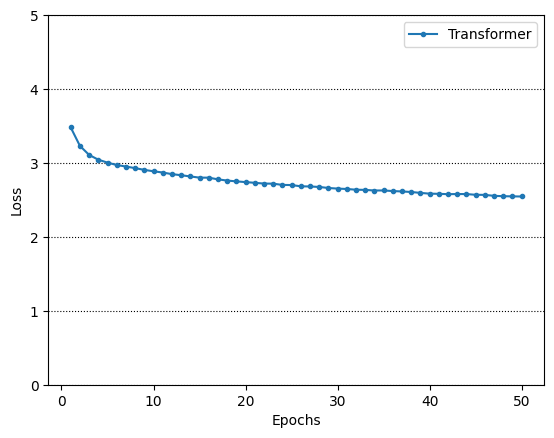

In [27]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_trans)+1)
plt.plot(xs, val_losses_trans, label="Transformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 5.0])
plt.legend()
plt.show()

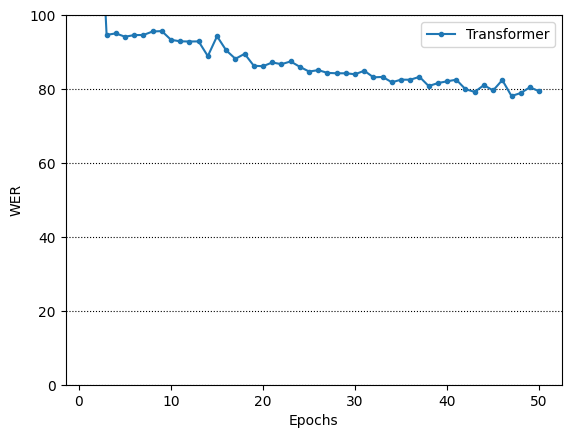

In [28]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_wers_trans)+1)
plt.plot(xs, test_wers_trans, label="Transformer", marker=".")
plt.xlabel("Epochs")
plt.ylabel("WER")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()